### Base Learner 6  - Normalize experiment

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
set_seed

<function fastai2.torch_core.set_seed(s)>

In [7]:
s=-1
s%(2**32-1)

4294967294

In [2]:
my_params = {'_train_seed':0, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_clean_path}
default_params.update(my_params)

In [3]:
set_seed(42)

In [4]:
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True,
                          b_testset_logger=True )

In [5]:
pipe0 = learn.dls[0].after_batch

pipe0_prime = Pipeline()
pipe0_prime.add(pipe0[0])
pipe0_prime.add(pipe0[1])
pipe0_prime.add(pipe0[2])

learn.dls[0].after_batch = pipe0_prime
learn.dls[1].after_batch = pipe0_prime
learn.dls[2].after_batch = pipe0_prime

##### w/o Normalize

In [6]:
set_seed(42)
with learn.no_logging(): learn.fit_one_cycle(10)

In [7]:
set_seed(42)
with learn.no_logging(): learn.fine_tune(20)

In [8]:
learn.cbs.pop(3)

easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

interp.print_classification_report()

              precision    recall  f1-score   support

black-bishop       1.00      1.00      1.00        14
  black-king       0.92      1.00      0.96        11
black-knight       0.92      1.00      0.96        12
  black-pawn       1.00      0.88      0.93        16
 black-queen       1.00      0.69      0.82        13
  black-rook       0.75      1.00      0.86        12
white-bishop       1.00      0.92      0.96        12
  white-king       1.00      0.93      0.96        14
white-knight       0.94      1.00      0.97        15
  white-pawn       1.00      1.00      1.00        15
 white-queen       0.93      1.00      0.97        14
  white-rook       1.00      1.00      1.00        14

    accuracy                           0.95       162
   macro avg       0.96      0.95      0.95       162
weighted avg       0.96      0.95      0.95       162



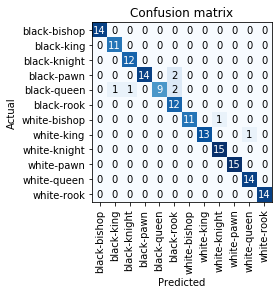

In [9]:
interp.plot_confusion_matrix()

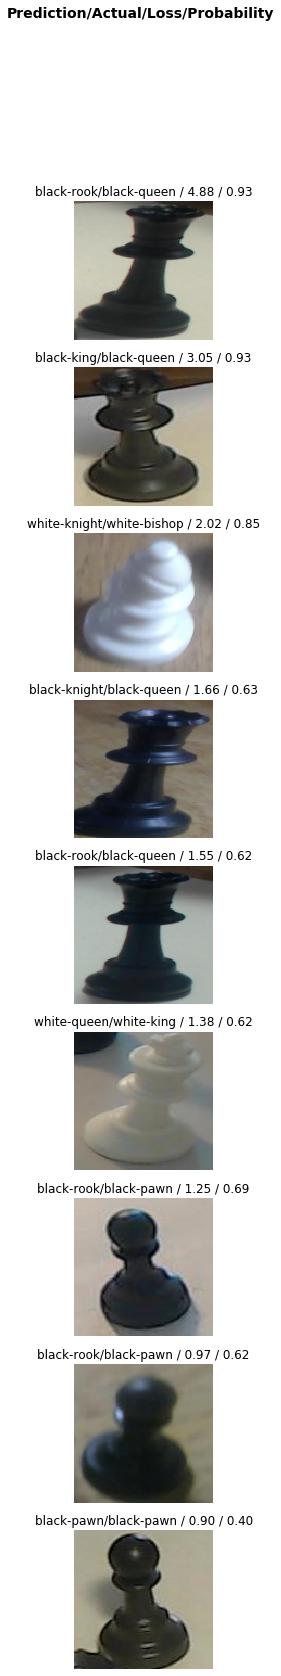

In [10]:
interp.plot_top_losses(9, nrows=9)